# Predicting Students Grades

I have proposed an interesting project that was inspired by the constant challenge for college students to how best allocate their time and effort, in accordance to their timetables, in order to achieve certain grades in their courses. 

I begin with the premise that most students do not settle for just barely passing their courses, but want to attain the highest possible grades.  If the available resources (e.g. time) were unlimited, the highest possible grades would obviously be A+ across the board.  However, given that resources are limited in reality (and not to mention the occasional parties), a student would likely be more interested in efficiency rather than straight As.  In other words, how does one acquire the highest grades (for some, maybe just a B average) with the least amount of effort?  

I am quite sure students in colleges and universities are not equipped with data-driven information.  Every year, about 50 (and up to 100s) of students enroll in specific core courses and leave behind much more data than only the mean and standard deviation (normally the only 2 metrics recorded by academic staff).  This data-driven information can be very useful in helping students choose their courses efficiently.  Most often, however, students would decide on their timetable and plan their effort throughout the term by talking to their peers.  This type of information is more subjective and biased in comparison to what data can provide. 

I have managed to acquire anonymous student grades (with proper permission) for an undergraduate chemical engineering course from 2005 to 2013.  Based on this data, I came up with questions from the point of view of a student who is trying to plan his/her timetable and course load at the beginning of the school term. 

Before presenting my results, I would like to mention some observations which I made from analysing the raw data; they are quite interesting and non-obvious: 

-	Performance of the students are unusually good in two of the school years (2006 and 2013).  These two years were exactly followed by a year in which a higher percentage of students failed or almost failed.  The performance here is evaluated based on the difference between the numbers of students who did exceptionally well compared to the ones who did exceptionally poorly for every school year. 

Based on this observation, I strongly suspect that the professors adjusted the material’s (exams) degree of difficulty accordingly after receiving such performance.  This action could be even taken subconsciously. 

-	The other observation, which is not really unexpected, is the wide distribution of raw scores associated with a particular letter grade.  The distribution is even wider with more average grades -- like a B -- which is what the average student really strives for.  This suggests that the student’s final grade is not so much determined by his/her own performance, but where he/she stands relative to other students.  The question here is not whether the assignment of grades is fair or not; what is interesting is how a student can maximize his chances of a good grade beforehand when he does not have any idea of how other students will do in the class and how difficult the upcoming exams will be. 


All these observations and thoughts, along with my own personal concerns back in my student days, made me think of a model which is not based on subjectivity and which can provide the students with some real quantification towards their decisions and goals.  In other words, variables such as the size of the class, the difficulty of the exams, the strength of other students enrolled in the class, and the professor’s judgment on distributing the letter grades all play a role in the final grade of the student.  Therefore, I decided to define the question by only focusing on what the student can control, which is the amount of work/performance he is willing to put into that specific course.  The question would be “How much work should I put in to guarantee my grade B (or higher) in this course, considering the uncertainties that are created by the aforementioned variables?”  

To answer this question, I considered the components of this specific course -- the assignments, midterm and final exam -- all in the unity scale regardless of the weight that the syllabus would assign to each.  One might argue that of course the final exam carries a higher weight than the assignments in most courses; that is true, but remember my main goal is to not confuse the student by throwing different numbers at him, but to provide him with one single number so that he can distribute his work accordingly.  My scheme is data-driven, so the importance of each different feature in the target value (the final letter grade) will be embedded into the model that will be trained on the data.  What I aim for is to let the student know that, for example, he would need to achieve 85% in all components of the course (assignments, midterms, and final exam), to guarantee an A in the given course.  Of course a student with lower marks might achieve that too, but recall the whole purpose of this project is to reduce subjectivity of the letter grade to different factors and narrow down the uncertainty associated with the other factors. 

To train the model, I have performed a few classification techniques on 75% of the data as the training set and tuned the parameters based on accuracy performance of the test data.  Five features are considered in this model training: assignments, midterm and final are the first three; and since both midterm and final are quite important, their multiplicative product is considered as the 4th feature.  The last feature is the probability of the students that are receiving every grade in every class.  To train the data, I found Naïve Bayesian, Random Forest, and Extra Tree classifications to be the most relevant amongst the classification techniques.  The performance of the latter two is significantly higher than Naïve Bayesian, and the Extra Tree classifier provides a slightly higher accuracy compared to Random Forest, which could become crucial when deciding on the exact percentage.  For example, the Random Forest classifier suggests 66% performance to achieve a B grade, while Extra-Tree classifies 66% as grade C.  Therefore, the model trained with Extra-Tree classifier should be considered the more conservative approach and is therefore the safest.  Also, note that the letter grades are clustered into 5 broad letter grades of A, B, C, D and F, as opposed to working with finer gradations (e.g. B- and B+).  Classification for higher number of groups is possible if we are provided with more data. 

I also had the opportunity to be provided with partial data on the latest summer term of this course, which is still ongoing.  This data includes the marks for half the assignments and the midterm exam.  To predict the final grade of this class, I was first required to predict the students’ final exam marks rather than assuming the same performance as for the midterm.  I first compared, based on past data, the distributions of the final exam to midterm for all 5 letter grades separately.  I realized that the first order statistics are very close for all grades, that is: all students tend to do better in the final exam of this course by at least 10 marks (0.1).  This is not surprising as students are usually more motivated after receiving their midterm marks.  However, still this improvement in marks is varying by 20 points around the mean, which is not insignificant.  This means that a student who received 60% in his midterm can still score 50%..  After this analysis, I used Gaussian distribution with the corresponding mean and standard deviation to simulate each student’s final exam mark.  The prediction of letter grade is applied using the previously trained model.  A bootstrapping on this data can also estimate the mean and standard deviation of this class’s grade points. 

In conclusion, I believe providing a student with this data-driven information at the beginning of the school term could positively influence the student’s distributed work load and lead to better final grades that are more representative of student’s highest potential.  Every university could deploy a similar scheme on the student data available for every course and provide the students enrolling in the specific courses with such quantifications.  In addition, this project could still be expanded with further personalization of the results.  One could provide such information to a student and, using additional information on the ability of the student, advise him further.  For example, based on previous performance of the student in other similar courses and understanding of his motivation and ability, one can guide him in making a more rational plan toward accomplishing the course.  The similarity between courses could also be quantified by a similarity matrix considering factors such as the importance of the course to a discipline, the size of the class, the seniority of the students taking that course, and so on. 


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#print pd.show_versions()
dat1 = pd.read_excel('./grades/314 (2005).xls',skiprows=2)
dat2 = pd.read_excel('./grades/314 (2006).xls',skiprows=2)
dat3 = pd.read_excel('./grades/314 (2007).xls',skiprows=2)
dat4 = pd.read_excel('./grades/314 (2008).xls',skiprows=2)
dat5 = pd.read_excel('./grades/314 (2009).xls',skiprows=1)
dat6 = pd.read_excel('./grades/314 (2010).xls',skiprows=1)
dat7 = pd.read_excel('./grades/314 (2011).xls',skiprows=1)
dat8 = pd.read_excel('./grades/314 (2012).xls',skiprows=1)
dat9 = pd.read_excel('./grades/314 (2013).xlsx',skiprows=1)

In [2]:
print 'Class_Size 2005 = '+ str(len(dat1))
print 'Class_Size 2006 = '+ str(len(dat2))
print 'Class_Size 2007 = '+ str(len(dat3))
print 'Class_Size 2008 = '+ str(len(dat4))
print 'Class_Size 2009 = '+ str(len(dat5))
print 'Class_Size 2010 = '+ str(len(dat6))
print 'Class_Size 2011 = '+ str(len(dat7))
print 'Class_Size 2012 = '+ str(len(dat8))
print 'Class_Size 2013 = '+ str(len(dat9))

Class_Size 2005 = 75
Class_Size 2006 = 71
Class_Size 2007 = 93
Class_Size 2008 = 88
Class_Size 2009 = 84
Class_Size 2010 = 83
Class_Size 2011 = 99
Class_Size 2012 = 85
Class_Size 2013 = 116


In [3]:
### Assuming no student wanna get F and D 
### and good students wanna pass with A+ or A
print 'Class_bottom 2005 = '+ str(sum((dat1.Grade=='F')|(dat1.Grade=='D-')|(dat1.Grade=='D')|(dat1.Grade=='D+')))
print 'Class_bottom 2006 = '+ str(sum((dat2.Grade=='F')|(dat2.Grade=='D-')|(dat2.Grade=='D')|(dat2.Grade=='D+')))
print 'Class_bottom 2007 = '+ str(sum((dat3.Grade=='F')|(dat3.Grade=='D-')|(dat3.Grade=='D')|(dat3.Grade=='D+')))
print 'Class_bottom 2008 = '+ str(sum((dat4.Grade=='F')|(dat4.Grade=='D-')|(dat4.Grade=='D')|(dat4.Grade=='D+')))
print 'Class_bottom 2009 = '+ str(sum((dat5.Grade=='F')|(dat5.Grade=='D-')|(dat5.Grade=='D')|(dat5.Grade=='D+')))
print 'Class_bottom 2010 = '+ str(sum((dat6.Grade=='F')|(dat6.Grade=='D-')|(dat6.Grade=='D')|(dat6.Grade=='D+')))
print 'Class_bottom 2011 = '+ str(sum((dat7.Grade=='F')|(dat7.Grade=='D-')|(dat7.Grade=='D')|(dat7.Grade=='D+')))
print 'Class_bottom 2012 = '+ str(sum((dat8.Grade=='F')|(dat8.Grade=='D-')|(dat8.Grade=='D')|(dat8.Grade=='D+')))
print 'Class_bottom 2013 = '+ str(sum((dat9.Grade=='F')|(dat9.Grade=='D-')|(dat9.Grade=='D')|(dat9.Grade=='D+')))

Class_bottom 2005 = 7
Class_bottom 2006 = 1
Class_bottom 2007 = 6
Class_bottom 2008 = 5
Class_bottom 2009 = 3
Class_bottom 2010 = 4
Class_bottom 2011 = 5
Class_bottom 2012 = 10
Class_bottom 2013 = 6


In [4]:
### it seems like after a class bad performance the next year class does very well... 
### Professor seems to makke easier exame the following year.. 2006 and 2013

print 'Class_top 2005 = '+ str(sum((dat1.Grade=='A+')|(dat1.Grade=='A')))
print 'Class_top 2006 = '+ str(sum((dat2.Grade=='A+')|(dat2.Grade=='A')))
print 'Class_top 2007 = '+ str(sum((dat3.Grade=='A+')|(dat3.Grade=='A')))
print 'Class_top 2008 = '+ str(sum((dat4.Grade=='A+')|(dat4.Grade=='A')))
print 'Class_top 2009 = '+ str(sum((dat5.Grade=='A+')|(dat5.Grade=='A')))
print 'Class_top 2010 = '+ str(sum((dat6.Grade=='A+')|(dat6.Grade=='A')))
print 'Class_top 2011 = '+ str(sum((dat7.Grade=='A+')|(dat7.Grade=='A')))
print 'Class_top 2012 = '+ str(sum((dat8.Grade=='A+')|(dat8.Grade=='A')))
print 'Class_top 2013 = '+ str(sum((dat9.Grade=='A+')|(dat9.Grade=='A')))

Class_top 2005 = 11
Class_top 2006 = 14
Class_top 2007 = 13
Class_top 2008 = 13
Class_top 2009 = 12
Class_top 2010 = 15
Class_top 2011 = 12
Class_top 2012 = 13
Class_top 2013 = 16


In [5]:
num = len(dat1)+len(dat2)+len(dat3)+len(dat4)+len(dat5)+len(dat6)+len(dat7)+len(dat8)+len(dat9)
values = pd.DataFrame(np.nan, index=range(0,num), columns= ['Aa','Mt','Fe'])
values = pd.concat([dat1.ix[:,'Aa':],dat2.ix[:,'Aa':],
                    dat3.ix[:,'Aa':],dat4.ix[:,'Aa':],dat5.ix[:,'Aa':],
                      dat6.ix[:,'Aa':],dat7.ix[:,'Aa':],dat8.ix[:,'Aa':],
                    dat9.ix[:,'Aa':]])
values = values.reset_index(drop=True)

labels = pd.DataFrame(np.nan, index=range(0,len(values)),columns=['lables'])
labels = pd.concat([dat1['Grade'],dat2['Grade'],dat3['Grade'],dat4['Grade'],dat5['Grade'],dat6['Grade'],
                    dat7['Grade'],dat8['Grade'],dat9['Grade']])

labels[(labels=='A+')|(labels=='A-')|(labels=='A')] = 'A'
labels[(labels=='B+')|(labels=='B')] = 'B'
labels[(labels=='C+')|(labels=='C')|(labels=='B-')] = 'C'
labels[(labels=='D+')|(labels=='D')|(labels=='C-')] = 'D'
labels[(labels=='F')|(labels=='D-')] = 'F'
labels = labels.reset_index(drop=True)

Std of grades A difference: 0.177153425783
Std of grades B difference: 0.234620142817
Std of grades C difference: 0.217932251032
Std of grades D difference: 0.196370082633
Std of grades F difference: 0.207862798879
Std of grades A difference: 0.21495914775


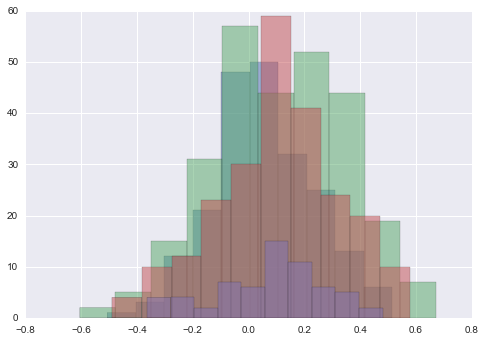

In [6]:
#for grade in labels:
#plt.figure()
#values['Mt'][(labels=='A')].hist(bins=30,alpha=0.5)
#values['Fe'][(labels=='A')].hist(bins=30,alpha=0.5)

plt.figure()
(values['Fe'][(labels=='A')]-values['Mt'][(labels=='A')]).hist(alpha=0.5)
(values['Fe'][(labels=='B')]-values['Mt'][(labels=='B')]).hist(alpha=0.5)
(values['Fe'][(labels=='C')]-values['Mt'][(labels=='C')]).hist(alpha=0.5)
(values['Fe'][(labels=='D')]-values['Mt'][(labels=='D')]).hist(alpha=0.5)

print 'Std of grades A difference: '+str((values['Fe'][(labels=='A')]-values['Mt'][(labels=='A')]).std(axis=0))
print 'Std of grades B difference: '+str((values['Fe'][(labels=='B')]-values['Mt'][(labels=='B')]).std(axis=0))
print 'Std of grades C difference: '+str((values['Fe'][(labels=='C')]-values['Mt'][(labels=='C')]).std(axis=0))
print 'Std of grades D difference: '+str((values['Fe'][(labels=='D')]-values['Mt'][(labels=='D')]).std(axis=0))
print 'Std of grades F difference: '+str((values['Fe'][(labels=='F')]-values['Mt'][(labels=='F')]).std(axis=0))
print 'Std of grades A difference: '+str((values['Fe']-values['Mt']).std(axis=0))

In [7]:
GradePoint = pd.DataFrame(0.0, index=xrange(num), columns=['GradePoints'])
GradePoint[(labels=='A')] = 4.0
GradePoint[(labels=='B')] = 3.0
GradePoint[(labels=='C')] = 2.0
GradePoint[(labels=='D')] = 1.0
GradePoint[(labels=='F')] = 0.0

l2=len(dat1)+len(dat2); l3=l2+len(dat3); l4=l3+len(dat4); l5=l4+len(dat5); 
l6=l5+len(dat6); l7=l6+len(dat7); l8=l7+len(dat8); 

print 'Point Average of 2005: ' +str(sum(GradePoint['GradePoints'][:len(dat1)])/(len(dat1)*1.0))
print 'Point Average of 2006: ' +str(sum(GradePoint['GradePoints'][len(dat1):l2])/(len(dat2)*1.0))
print 'Point Average of 2007: ' +str(sum(GradePoint['GradePoints'][l2:l3])/(len(dat3)*1.0))
print 'Point Average of 2008: ' +str(sum(GradePoint['GradePoints'][l3:l4])/(len(dat4)*1.0))
print 'Point Average of 2009: ' +str(sum(GradePoint['GradePoints'][l4:l5])/(len(dat5)*1.0))
print 'Point Average of 2010: ' +str(sum(GradePoint['GradePoints'][l5:l6])/(len(dat6)*1.0))
print 'Point Average of 2011: ' +str(sum(GradePoint['GradePoints'][l6:l7])/(len(dat7)*1.0))
print 'Point Average of 2012: ' +str(sum(GradePoint['GradePoints'][l7:l8])/(len(dat8)*1.0))
print 'Point Average of 2013: ' +str(sum(GradePoint['GradePoints'][l8:])/(len(dat9)*1.0))

Point Average of 2005: 2.73333333333
Point Average of 2006: 2.9014084507
Point Average of 2007: 2.68817204301
Point Average of 2008: 2.82954545455
Point Average of 2009: 2.79761904762
Point Average of 2010: 2.86746987952
Point Average of 2011: 2.74747474747
Point Average of 2012: 2.57647058824
Point Average of 2013: 2.81034482759


In [8]:
Bstudent = pd.concat([dat1['FF(100)'],dat3['FF(100)'],dat4['FF(100)'],dat5['FF(100)'],
                   dat6['FF(100)'],dat7['FF(100)'],dat8['FF(100)'],dat9['FF(100)']],axis=1)

print np.mean(dat1['FF(100)']), np.mean(dat2['FF(100)']),np.mean(dat3['FF(100)'])
print np.mean(dat4['FF(100)']), np.mean(dat5['FF(100)']),np.mean(dat6['FF(100)'])
print np.mean(dat7['FF(100)']), np.mean(dat8['FF(100)']),np.mean(dat9['FF(100)'])

59.9608032129 73.5016279495 51.0854070661
59.315697601 62.6296768707 74.6585660339
62.0024217329 66.5087165775 70.9498891626
